In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from utils.set_seed import set_seed

set_seed(42)

In [2]:
# Acessando os metadados

df = pd.read_csv(r'data\raw\metadata.csv')
df.drop(columns=['Tumor Border'], inplace=True)
df.head().style

,ID,Image Path,Mask Path,Label,PID
0,1,data\raw\png\1.png,data\raw\masks\1_mask.png,1,100360
1,10,data\raw\png\10.png,data\raw\masks\10_mask.png,1,101016
2,100,data\raw\png\100.png,data\raw\masks\100_mask.png,1,107494
3,1000,data\raw\png\1000.png,data\raw\masks\1000_mask.png,3,112649
4,1001,data\raw\png\1001.png,data\raw\masks\1001_mask.png,3,112649


In [3]:
# Checking for unique patients

print(f"Unique patients: {df['PID'].nunique()}")

# Checking for presence of patient across dataset

patient_counts = df.groupby('PID')['PID'].count()
patients_with_multiple_exams = patient_counts[patient_counts > 1]

if patients_with_multiple_exams.empty:
    print("No patients with multiple exams")
else:
    print(f"Patients with multiple exams: {patients_with_multiple_exams.count()}")

# Checkig for multiple tumor patients

unique_label_counts = df.groupby('PID')['Label'].nunique()
patients_with_multiple_tumors = unique_label_counts[unique_label_counts > 1]

if patients_with_multiple_tumors.empty:
    print("No patients with multiple tumor types")
else:
    print(f"Patients with multiple tumors types: {patients_with_multiple_tumors.count()}")



Unique patients: 233
Patients with multiple exams: 226
No patients with multiple tumor types


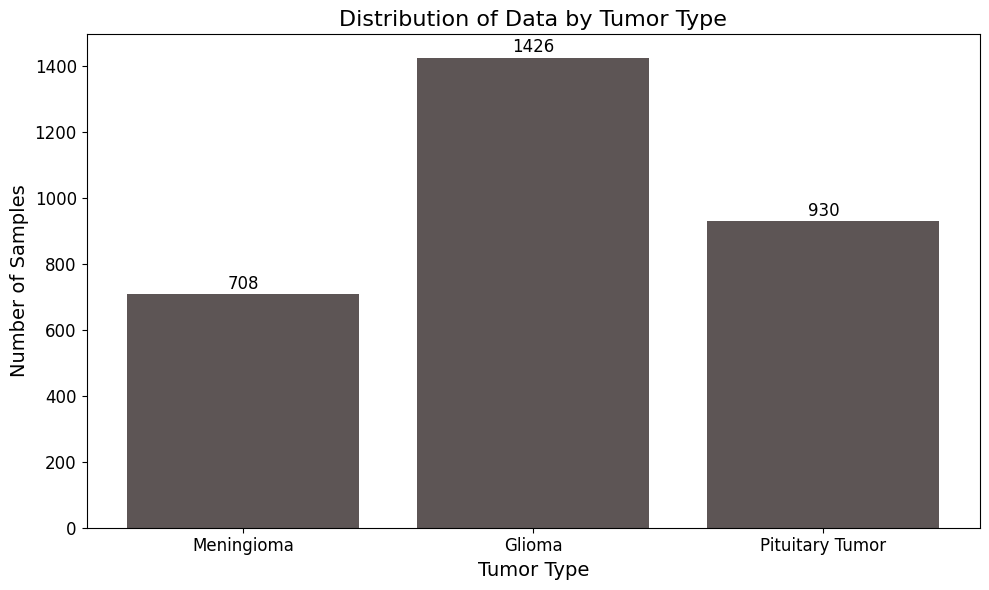

In [4]:
# Checking Tumor Type Distribution

distribution = df[['Label', 'PID']].groupby(by='Label').count().reset_index()

labels = ['Meningioma', 'Glioma', 'Pituitary Tumor']

plt.figure(figsize=(10, 6))
bars = plt.bar(distribution['Label'], distribution['PID'], color='#5d5555')

plt.xlabel('Tumor Type', fontsize=14)
plt.ylabel('Number of Samples', fontsize=14)
plt.title('Distribution of Data by Tumor Type', fontsize=16)
plt.xticks(distribution['Label'], labels, fontsize=12)
plt.yticks(fontsize=12)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 2), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

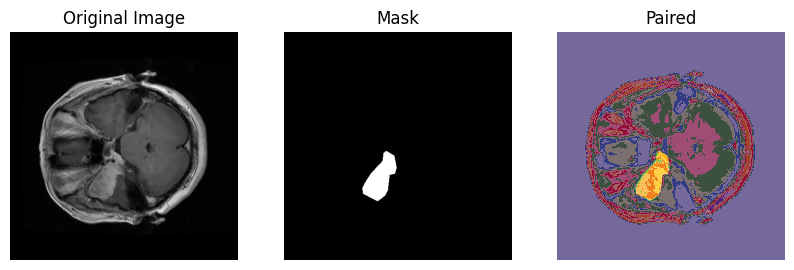

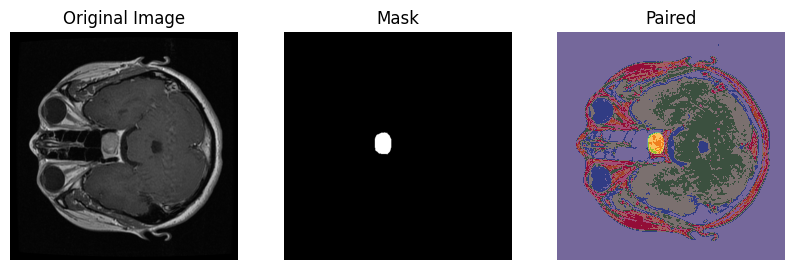

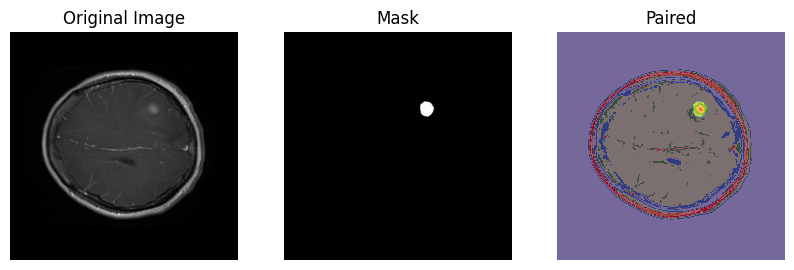

In [5]:
# Checking some arbitrary images

def plot_image_and_mask(image_path, mask_path):
    
    image = Image.open(image_path)
    mask = Image.open(mask_path)
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 3, 1)
    plt.axis('off')
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.subplot(1, 3, 2)
    plt.axis('off')
    plt.title('Mask')
    plt.imshow(mask, cmap='gray')
    plt.subplot(1, 3, 3)
    plt.axis('off')
    plt.title('Paired')
    plt.imshow(image, cmap='Paired')
    plt.imshow(mask, alpha=0.5)
    plt.show()

plot_image_and_mask(r'data\raw\png\1.png', r'data\raw\masks\1_mask.png')
plot_image_and_mask(r'data\raw\png\1000.png', r'data\raw\masks\1000_mask.png')
plot_image_and_mask(r'data\raw\png\1852.png', r'data\raw\masks\1852_mask.png')

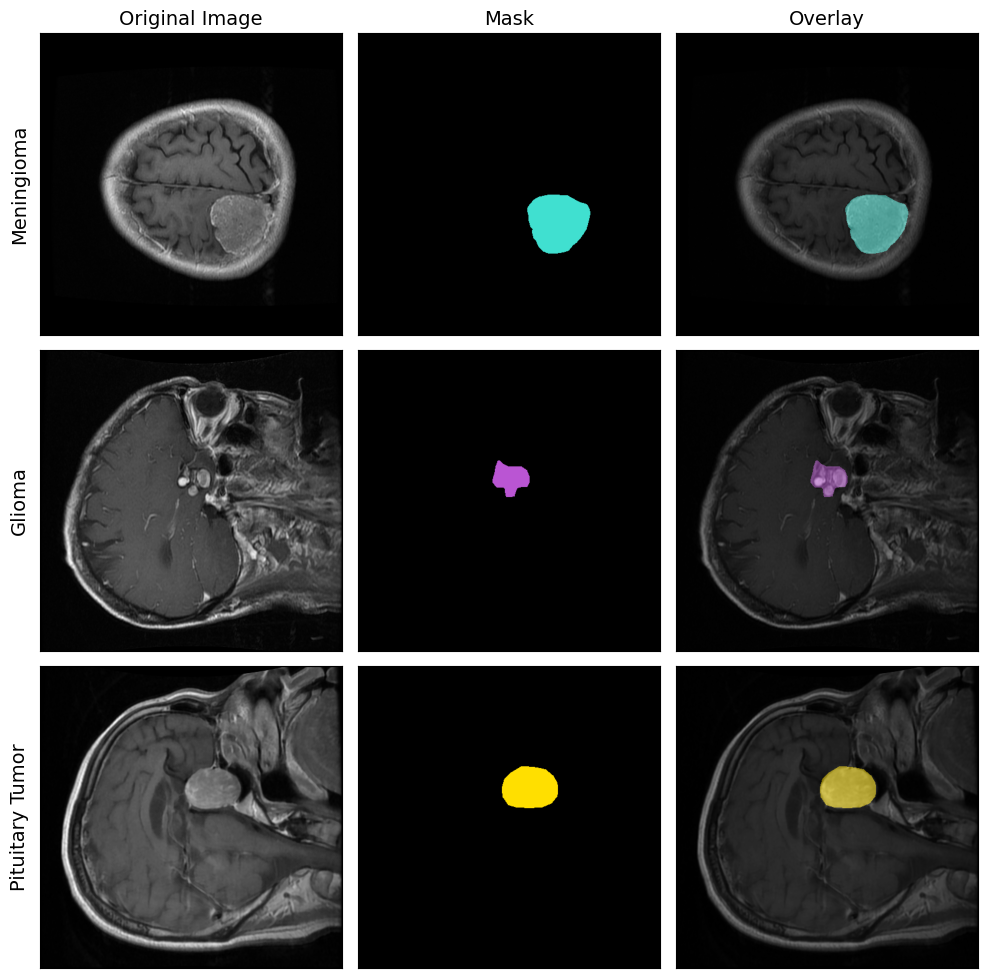

In [6]:
def plot_images_from_df(df):
    """
    Plot three sets of images (original, mask, and overlay) from a given DataFrame.
    Each set corresponds to a different tumor label (Meningioma, Glioma, Pituitary Tumor).
    The function will randomly select one image of each label from the provided DataFrame.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing the image paths and labels.
        Expected columns:
            - 'Image Path': Path to the original image.
            - 'Mask Path': Path to the mask image.
            - 'Label': Tumor label (1 for Meningioma, 2 for Glioma, 3 for Pituitary Tumor).
    
    Returns:
    --------
    None. Displays a matplotlib plot with the images, masks, and overlays.
    
    Example:
    --------
    >>> plot_images_from_df(df)
    """
    
    random_samples = df.groupby('Label').apply(lambda x: x.sample(1)).reset_index(drop=True)
    
    colors = {
        85: [64, 224, 208],  # Turquoise for Meningioma
        170: [186, 85, 211], # Pink for Glioma
        255: [255, 223, 0]   # Yellow for Pituitary Tumor
    }
    
    label_dict = {
        1: 'Meningioma',
        2: 'Glioma',
        3: 'Pituitary Tumor'
    }
    
    fig, axs = plt.subplots(3, 3, figsize=(10, 10))
    
    for i, row in random_samples.iterrows():
        image = Image.open(row['Image Path'])
        mask = Image.open(row['Mask Path'])
        mask_np = np.array(mask)
        
        colored_mask = np.zeros((mask_np.shape[0], mask_np.shape[1], 3), dtype=np.uint8)
        for intensity, color in colors.items():
            colored_mask[mask_np == intensity] = color

        axs[i, 0].imshow(image, cmap='gray')
        axs[i, 0].set_yticks([])
        axs[i, 0].set_xticks([])
        if i == 0:
            axs[i, 0].set_title('Original Image', fontsize=14)
        
        axs[i, 1].imshow(colored_mask)
        axs[i, 1].set_yticks([])
        axs[i, 1].set_xticks([])
        if i == 0:
            axs[i, 1].set_title('Mask', fontsize=14)
        
        axs[i, 2].imshow(image, cmap='gray')
        axs[i, 2].imshow(colored_mask, alpha=0.5)
        axs[i, 2].set_yticks([])
        axs[i, 2].set_xticks([])
        if i == 0:
            axs[i, 2].set_title('Overlay', fontsize=14)
        
        label_name = label_dict[row['Label']]
        axs[i, 0].set_ylabel(label_name, fontsize=14, labelpad=15, verticalalignment='center')
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()


plot_images_from_df(df)